In [16]:
print("all ok")

all ok


In [17]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [18]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [19]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more a

In [20]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more accurately. That wo

In [21]:
from langchain.tools import tool

## this is my custom tools

In [22]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [23]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [24]:
search.invoke("what is the latest update on iphone17 release?")

"Some iPhone 17 models (maybe even all of them) will have a new camera bump, a wide rectangular raised area that stretches across the phone similar in style to Google's Pixel line. According to a ... Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... • The iPhone 17's display may not match what the Pro model offers. • iOS 26, Apple's iPhone software update for later this year, got a preview at WWDC. • The iPhone 17 could support a new ... The iPhone 17 lineup brings significant technological improvements across design, performance, and functionality. Apple's latest innovations focus on enhanced displays, powerful processing capabilities, and advanced camera systems.. Innovative Design and Display. The iPhone 17 Pro Max features a larger 6.86-inch display, marking a notable size increase. The iPhone 17 is already shaping up to be one of its 

In [25]:
tools=[multiply, add, divide, search]

In [26]:
llm_with_tools=llm.bind_tools(tools)

In [27]:
response=llm_with_tools.invoke("hi")

In [28]:
response.content

'Hello! How can I assist you today?'

In [29]:
response.tool_calls

[]

In [30]:
response=llm_with_tools.invoke("what is 2+2?")

In [31]:
response.content

''

In [32]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'k2cyy7b8j',
  'type': 'tool_call'}]

In [33]:
response=llm_with_tools.invoke("what is 10/2?")

In [34]:
response.content

''

In [35]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '22s90skzb',
  'type': 'tool_call'}]

In [36]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [37]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9zsbhag2p', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 417, 'prompt_tokens': 402, 'total_tokens': 819, 'completion_time': 1.615152613, 'prompt_time': 0.025883351, 'queue_time': 0.205407794, 'total_time': 1.6410359639999998}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4019e57e-3c6b-466e-a9a8-e0ed9fc8d57b-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': '9zsbhag2p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 417, 'total_tokens': 819})

In [38]:
response.content

''

In [39]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': '9zsbhag2p',
  'type': 'tool_call'}]

In [ ]:
#class MessagesState(TypedDict):
    #messages: Annotated[list[AnyMessage], add_messages]

NameError: name 'TypedDict' is not defined

In [41]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [42]:
user_query=["tell me what is 2+2"]

In [43]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [52]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [49]:
def function_1(state:MessagesState):
    
    user_question = state["messages"]
    
    input_question = [SYSTEM_PROMPT] + user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages": [response]
    }
    
    

In [53]:
builder=StateGraph(MessagesState)

In [54]:
builder.add_node("llm_decision_step",function_1)

In [55]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000023A89008D60>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000023A89008E00>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000023A8900AD40>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [56]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [57]:
builder.add_edge(START,"llm_decision_step")

In [58]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [59]:
builder.add_edge("tools","llm_decision_step")

In [60]:
react_graph=builder.compile()

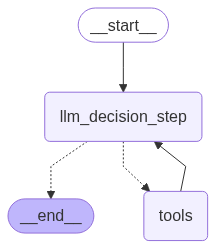

In [61]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [62]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [63]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='3f11e800-4a47-4f5d-9118-a63e45e02f85'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cgj0cprgb', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 308, 'prompt_tokens': 423, 'total_tokens': 731, 'completion_time': 1.12, 'prompt_time': 0.027116083, 'queue_time': 0.210691933, 'total_time': 1.147116083}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e6c62936-d522-423c-9204-749123cab5b0-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'cgj0cprgb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 308, 'total_tokens': 731}),
  ToolMessage(content='Narendra Modi is t

In [64]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [65]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='ea857ddf-c9a2-450c-aecf-a1c3c17d5dd3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'srr4pwzw2', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 538, 'prompt_tokens': 427, 'total_tokens': 965, 'completion_time': 1.9920456020000001, 'prompt_time': 0.027363028, 'queue_time': 0.207909767, 'total_time': 2.01940863}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d96c3bcf-cf90-4fb7-ba46-adb7a9b1f9f0-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'srr4pwzw2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 538, 'total_tokens': 

In [66]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [67]:
response=react_graph.invoke({"messages":message})

In [68]:
response["messages"][-1].content

'The speed of light in meters per second is approximately 300,000,000 m/s. When multiplied by 10, the result is 3,000,000,000 m/s. This calculation helps in understanding the scale and magnitude of the speed of light, especially in scientific contexts where such large numbers are common.'

In [69]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (20sfnbstk)
 Call ID: 20sfnbstk
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================
Tool Calls:
  multiply (7qpp2eszz)
 Call ID: 7qpp2eszz
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light in meters per second is approximately 300,000,000 m/s. When multiplied by 10, the result is 3,000,000,000 m/s. This calculation helps in understanding the scale and magnitude of the speed of light, espe

In [70]:
import yfinance as yf

In [71]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [72]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $199.20.'

In [73]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $319.11.'

In [74]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000023A89008D60>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000023A89008E00>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000023A8900AD40>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [75]:
tools = [add, multiply, divide, search,get_stock_price]

In [76]:
llm_with_tools=llm.bind_tools(tools)

In [77]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [78]:
response.content

''

In [79]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'vdbatw7t4',
  'type': 'tool_call'}]

In [80]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [81]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

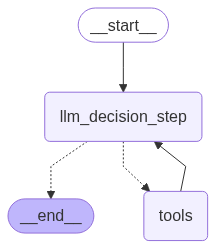

In [ ]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [82]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [83]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (2jr41gmmc)
 Call ID: 2jr41gmmc
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (9kckd34yv)
 Call ID: 9kckd34yv
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================


In [84]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (dkvyz3717)
 Call ID: dkvyz3717
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (44rn4a6n0)
 Call ID: 44rn4a6n0
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (w73514cxw)
 Call ID: w73514cxw
  Args:
    ticker: AAPL
===========================

In [ ]:
next class:
1. human in loop
2. agentic RAG
3. multiagent system(collabation and supervisor)
4. some mislionoius concept of the langgraph: sub graph, parllal execution etc

In [ ]:
Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    